In [1]:
import cv2
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
output_path = '/Users/user/Desktop/image1_generation/latest_net_G_val/images/output/'
target_path = '/Users/user/Desktop/image1_generation/latest_net_G_val/images/target/'
#save_path = '/Users/user/Desktop/image1_generation/latest_net_G_val/images/save'
dirs_out= os.listdir(output_path)
dirs_tar= os.listdir(target_path)

In [3]:
def error_graph(dirs_out,dirs_tar,output_path,target_path):
    dirs_out.sort()
    dirs_tar.sort()
    x = np.arange(0,len(dirs_out),1)
    y = []
    for out_img_name,tar_img_name in zip(dirs_out,dirs_tar):
        print "processing :",output_path,out_img_name
        out_img = cv2.imread(output_path+out_img_name).astype(np.int8)
        tar_img = cv2.imread(target_path+tar_img_name).astype(np.int8)

        diff = map(abs,out_img - tar_img)
        height,width,channel = tar_img.shape
        nor_dif = np.zeros((height,width))
        for h in range(len(diff)):
            for w in range(len(diff[h])):
                nor_dif[h][w] = np.sum(diff[h][w])

        nor_max = nor_dif.max()
        for h in range(len(diff)):
            for w in range(len(diff[h])):
                nor_dif[h][w] = 255*(1 - nor_dif[h][w]/nor_max)
        y.append(float(sum(map(sum, nor_dif))))
    
    print y
    error_max = max(y)
    y = map(lambda x: x/error_max, y)
    
    my_xticks = dirs_out
    plt.xticks(x, my_xticks)
    plt.plot(x, y)
    plt.tick_params(rotation = 90.0)
    plt.show()

processing : /Users/user/Desktop/image1_generation/latest_net_G_val/images/output/ Image1_0000.png
processing : /Users/user/Desktop/image1_generation/latest_net_G_val/images/output/ Image1_0010.png
processing : /Users/user/Desktop/image1_generation/latest_net_G_val/images/output/ Image1_0020.png
processing : /Users/user/Desktop/image1_generation/latest_net_G_val/images/output/ Image1_0030.png
processing : /Users/user/Desktop/image1_generation/latest_net_G_val/images/output/ Image1_0040.png
processing : /Users/user/Desktop/image1_generation/latest_net_G_val/images/output/ Image1_0050.png
processing : /Users/user/Desktop/image1_generation/latest_net_G_val/images/output/ Image1_0060.png
processing : /Users/user/Desktop/image1_generation/latest_net_G_val/images/output/ Image1_0080.png
processing : /Users/user/Desktop/image1_generation/latest_net_G_val/images/output/ Image1_0090.png
processing : /Users/user/Desktop/image1_generation/latest_net_G_val/images/output/ Image1_0100.png
processing

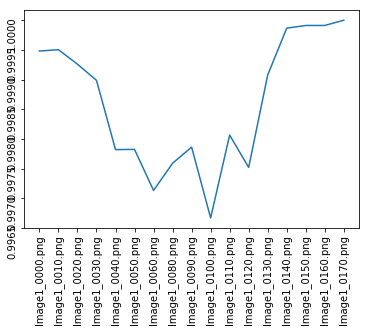

In [4]:
error_graph(dirs_out[1:],dirs_tar[1:],output_path,target_path)